<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/Drugs_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# https://www.kaggle.com/datasets/prathamtripathi/drug-classification

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
drugs = pd.read_csv('/content/drug200.xls')
drugs.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
103,56,M,NORMAL,HIGH,8.966,drugX
76,36,F,HIGH,HIGH,11.198,drugA
107,42,M,LOW,HIGH,20.013,DrugY
3,28,F,NORMAL,HIGH,7.798,drugX
67,17,M,NORMAL,NORMAL,10.832,drugX


In [25]:
valores_sex = np.unique(drugs['Sex'])
valores_bp = np.unique(drugs['BP'])
valores_ch = np.unique(drugs['Cholesterol'])
valores_drug = np.unique(drugs['Drug'])
print(valores_sex)
print(valores_bp)
print(valores_ch)
print(valores_drug)

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [26]:
drugs.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [27]:
colunas_dummy = ['Sex', 'Cholesterol']
for coluna in colunas_dummy:
  valores_unicos = drugs[coluna].unique()
  for valor in valores_unicos:
    dummy_coluna = f"{coluna}_{valor}_dummy"
    drugs[dummy_coluna] = drugs.apply(lambda row: 1 if row[coluna] == valor else 0, axis=1)
drugs = drugs.drop(columns=colunas_dummy)
drugs = drugs.drop(columns=['Sex_M_dummy'])
drugs = drugs.drop(columns=['Cholesterol_NORMAL_dummy'])
def bp_categoria(bp):
  if bp == 'HIGH':
    return 2
  elif bp == 'NORMAL':
    return 1
  else:
    return 0
drugs['BP'] = drugs.apply(lambda row: bp_categoria(row['BP']), axis=1)
drugs

,Age,BP,Na_to_K,Drug,Sex_F_dummy,Cholesterol_HIGH_dummy
0,23,2,25.355,DrugY,1,1
1,47,0,13.093,drugC,0,1
2,47,0,10.114,drugC,0,1
3,28,1,7.798,drugX,1,1
4,61,0,18.043,DrugY,1,1
...,...,...,...,...,...,...
195,56,0,11.567,drugC,1,1
196,16,0,12.006,drugC,0,1
197,52,1,9.894,drugX,0,1
198,23,1,14.020,drugX,0,0


In [28]:
drugs['Age_20'] = drugs.apply(lambda row: 1 if row['Age'] < 20 else 0, axis=1)
drugs['Age_40'] = drugs.apply(lambda row: 1 if row['Age'] < 40 else 0, axis=1)
drugs['Age_60'] = drugs.apply(lambda row: 1 if row['Age'] < 60 else 0, axis=1)
drugs['Age_60+'] = drugs.apply(lambda row: 1 if row['Age'] >= 60 else 0, axis=1)
drugs = drugs.drop(columns=['Age'])
drugs

,BP,Na_to_K,Drug,Sex_F_dummy,Cholesterol_HIGH_dummy,Age_20,Age_40,Age_60,Age_60+
0,2,25.355,DrugY,1,1,0,1,1,0
1,0,13.093,drugC,0,1,0,0,1,0
2,0,10.114,drugC,0,1,0,0,1,0
3,1,7.798,drugX,1,1,0,1,1,0
4,0,18.043,DrugY,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
195,0,11.567,drugC,1,1,0,0,1,0
196,0,12.006,drugC,0,1,1,1,1,0
197,1,9.894,drugX,0,1,0,0,1,0
198,1,14.020,drugX,0,0,0,1,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

In [30]:
drugs.columns

Index(['BP', 'Na_to_K', 'Drug', 'Sex_F_dummy', 'Cholesterol_HIGH_dummy',
       'Age_20', 'Age_40', 'Age_60', 'Age_60+'],
      dtype='object')

In [34]:
colunas = ['BP', 'Na_to_K', 'Sex_F_dummy', 'Cholesterol_HIGH_dummy',
       'Age_20', 'Age_40', 'Age_60', 'Age_60+']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(drugs[colunas], drugs[['Drug']], test_size=0.5, random_state=42)

In [36]:
classificador = DecisionTreeClassifier(random_state=42)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.95


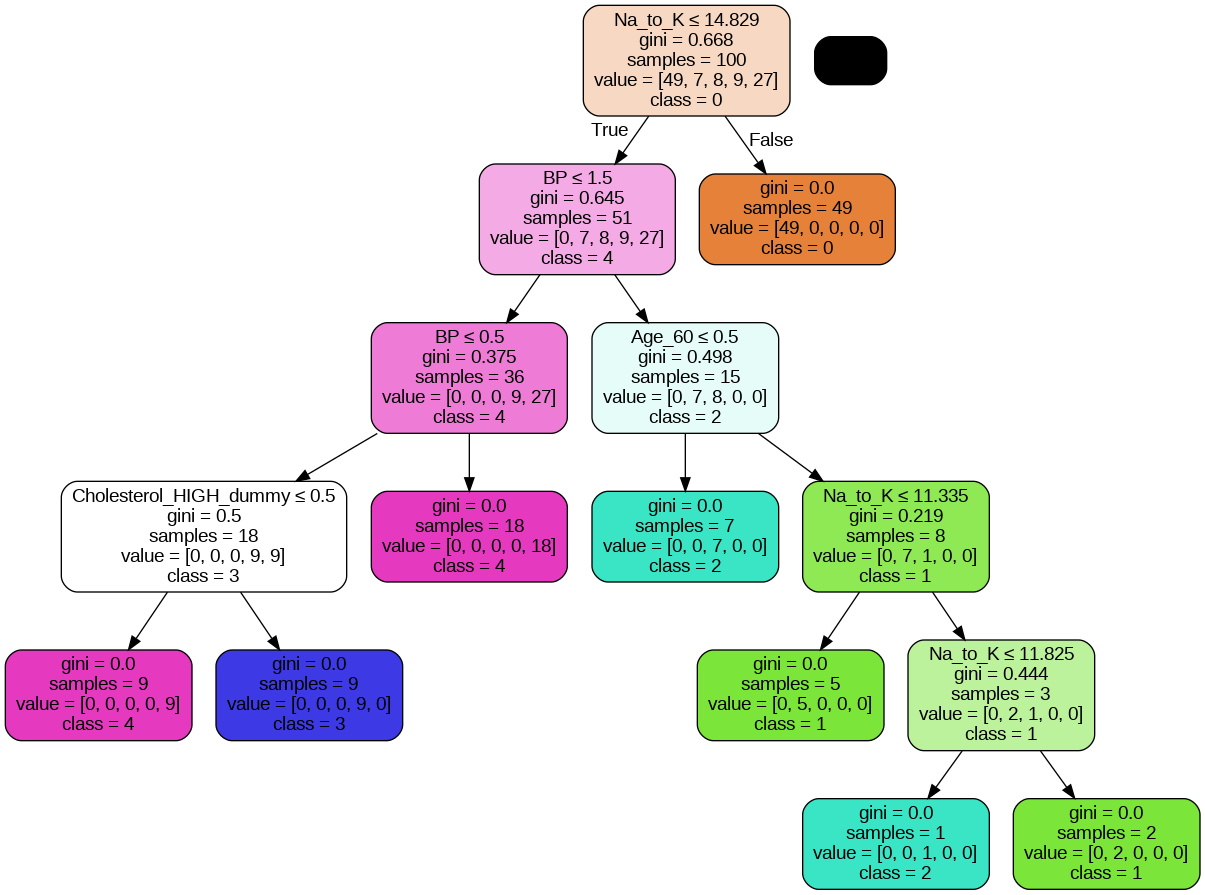

In [37]:
class_names = [str(i) for i in range(7)]
dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = colunas, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [38]:
classificador = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, max_depth=1)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.69


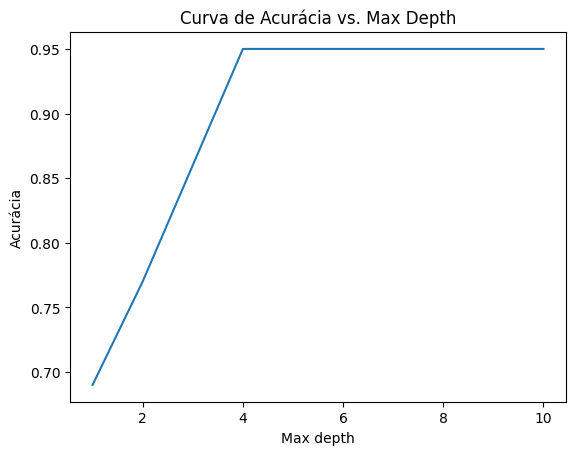

In [40]:
acuracias = []
for max_depth in range(1, 11):
  modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  modelo.fit(x_train, y_train)
  y_pred = modelo.predict(x_test)
  acuracia = accuracy_score(y_test, y_pred)
  acuracias.append(acuracia)

plt.plot(range(1, 11), acuracias)
plt.xlabel("Max depth")
plt.ylabel("Acurácia")
plt.title("Curva de Acurácia vs. Max Depth")
plt.show()

In [41]:
print("Max Depth | Accuracy")
print("-" * 20)
for i, accuracy in enumerate(acuracias):
    print(f"{i+1} | {accuracy:.4f}")

Max Depth | Accuracy
--------------------
1 | 0.6900
2 | 0.7700
3 | 0.8600
4 | 0.9500
5 | 0.9500
6 | 0.9500
7 | 0.9500
8 | 0.9500
9 | 0.9500
10 | 0.9500


In [44]:
classificador_random = RandomForestClassifier(oob_score =True, n_estimators=10, random_state=42)
classificador_random.fit(x_train, y_train.values.ravel())
y_pred = classificador_random.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Acurácia OOB:", classificador_random.oob_score_)

Acurácia: 0.95
Acurácia OOB: 0.84


In [45]:
lista_n_estimators = [10, 100, 1000]
criterios_list = ['gini', 'log_loss']
max_depth_list = range(1,11)
resultados = []

In [46]:
for n_estimator in lista_n_estimators:
  for criterio in criterios_list:
    for max_depth in max_depth_list:
      modelo = RandomForestClassifier(n_estimators=n_estimator, criterion=criterio, max_depth=max_depth, random_state=42)
      modelo.fit(x_train, y_train.values.ravel())
      y_pred = modelo.predict(x_test)
      acuracia = accuracy_score(y_test, y_pred)
      resultados.append((n_estimator, criterio, max_depth, acuracia))

In [48]:
resultados_df = pd.DataFrame(resultados, columns=['n_estimators', 'criterio', 'max_depth', 'acuracia'])
resultados_df

,n_estimators,criterio,max_depth,acuracia
0,10,gini,1,0.42
1,10,gini,2,0.71
2,10,gini,3,0.81
3,10,gini,4,0.81
4,10,gini,5,0.92
5,10,gini,6,0.93
6,10,gini,7,0.92
7,10,gini,8,0.92
8,10,gini,9,0.93
9,10,gini,10,0.95


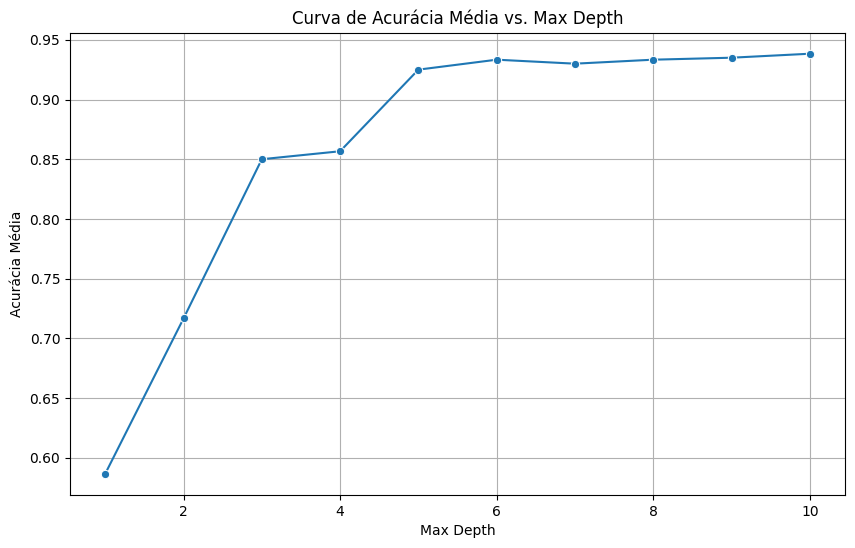

   max_depth  acuracia
0          1  0.586667
1          2  0.716667
2          3  0.850000
3          4  0.856667
4          5  0.925000
5          6  0.933333
6          7  0.930000
7          8  0.933333
8          9  0.935000
9         10  0.938333


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
resultados_agrupados = resultados_df.groupby('max_depth')['acuracia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_agrupados, x='max_depth', y='acuracia', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Max Depth')
plt.grid(True)
plt.show()
print(resultados_agrupados)

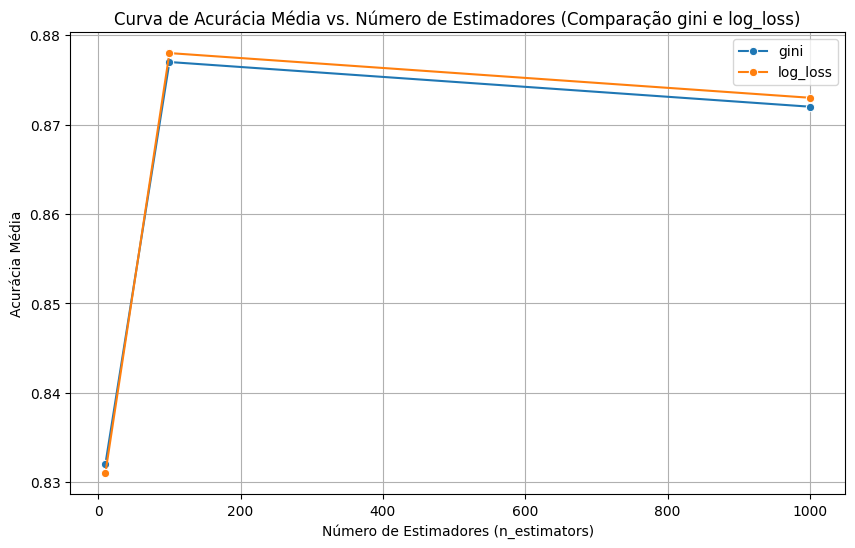

Resultados para critério 'gini':
   n_estimators  acuracia
0            10     0.832
1           100     0.877
2          1000     0.872

Resultados para critério 'log_loss':
   n_estimators  acuracia
0            10     0.831
1           100     0.878
2          1000     0.873


In [50]:
import matplotlib.pyplot as plt
resultados_gini = resultados_df[resultados_df['criterio'] == 'gini']
resultados_gini_agrupados = resultados_gini.groupby('n_estimators')['acuracia'].mean().reset_index()

resultados_log_loss = resultados_df[resultados_df['criterio'] == 'log_loss']
resultados_log_loss_agrupados = resultados_log_loss.groupby('n_estimators')['acuracia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_gini_agrupados, x='n_estimators', y='acuracia', marker='o', label='gini')
sns.lineplot(data=resultados_log_loss_agrupados, x='n_estimators', y='acuracia', marker='o', label='log_loss')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Número de Estimadores (Comparação gini e log_loss)')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados para critério 'gini':")
print(resultados_gini_agrupados)
print("\nResultados para critério 'log_loss':")
print(resultados_log_loss_agrupados)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [52]:
x_train, x_test, y_train, y_test = train_test_split(drugs[colunas],
        drugs[['Drug']], test_size=0.25, random_state=42)

In [56]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [53]:
model = LinearDiscriminantAnalysis(n_components=1)
x_train_nda = model.fit_transform(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(2))
print(x_train_nda.shape)

Acurácia: 0.86
(150, 1)


In [55]:
model = LinearDiscriminantAnalysis(n_components=1, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

model = LinearDiscriminantAnalysis(n_components=1, solver='lsqr', shrinkage=1) # mínimos quadrados, shrinkage tenta regularizar a covariância da amostra
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# model = QuadraticDiscriminantAnalysis()
# model.fit(x_train, y_train.values.ravel())
# y_pred = model.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.86
0.66
